problem statement: given a dataset which has some value and fetal health based on them , create a classifcation model to classify the fetal health.

let us first install all libraries which will be helpfull for us to perform the task

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

lets start with reading the data in padas dataframe

In [23]:
df=pd.read_csv('/content/fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


lets us get some insights on the data by using .describe() method

In [24]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

as we have a lot variables let us check their correlation with each other

<Axes: >

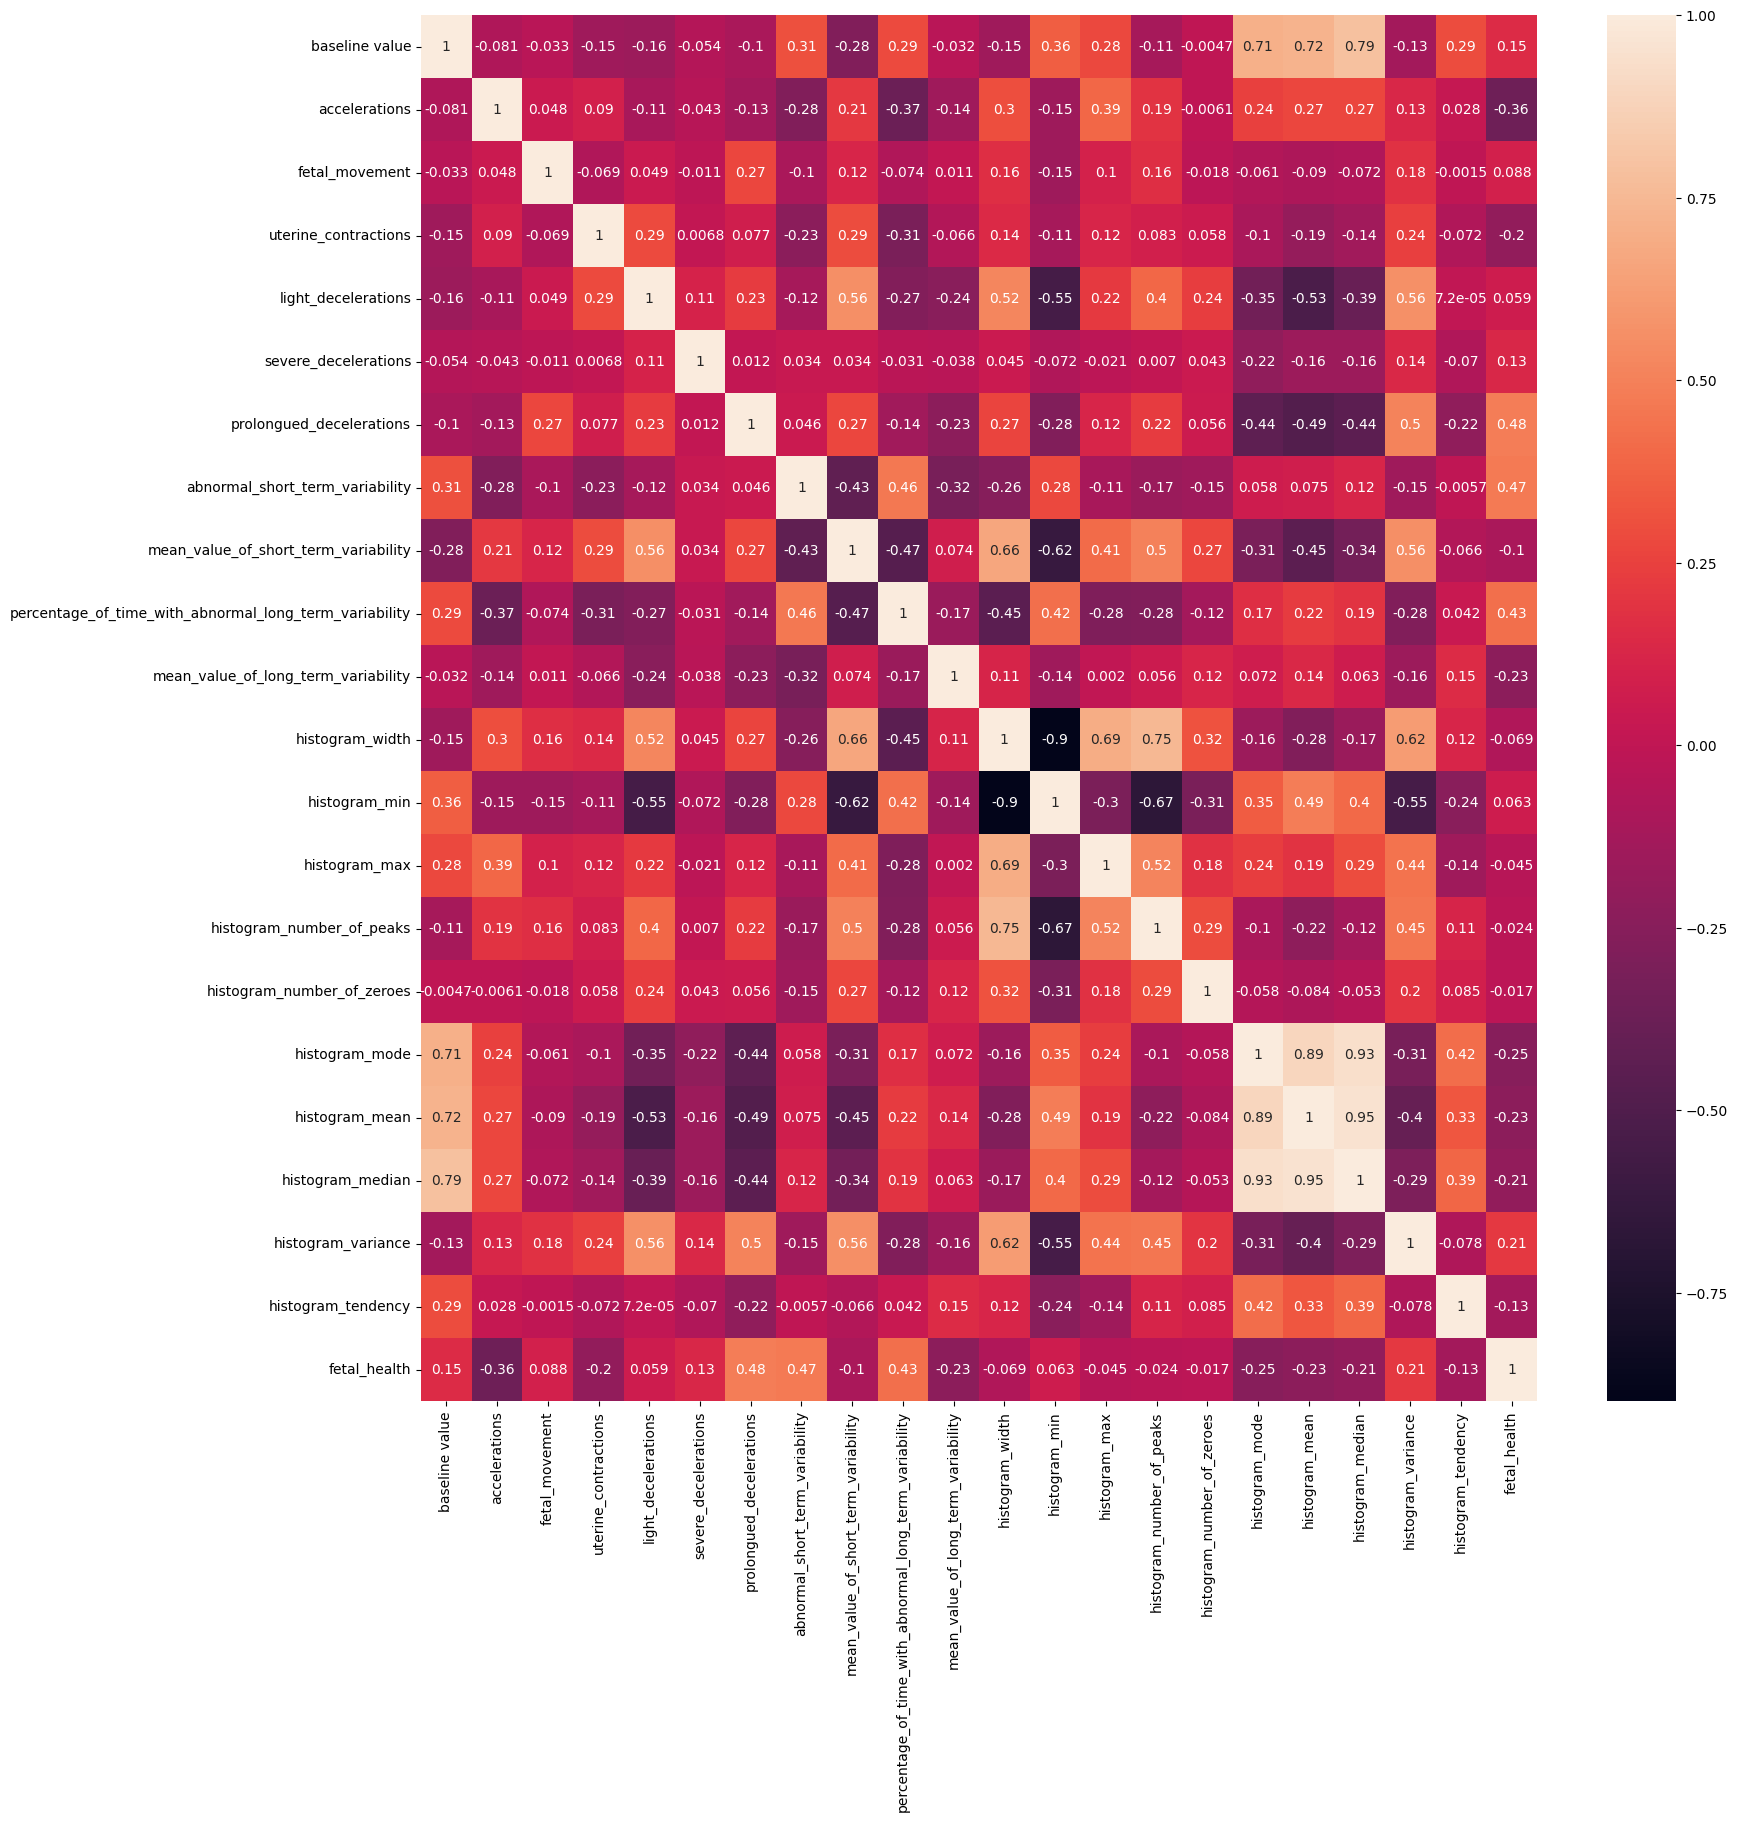

In [26]:
plt.subplots(figsize = (18, 18))
sns.heatmap(df.corr(), annot = True)

now let us look what is the amount of  the diffrent classes present in the data set

Counts of class column


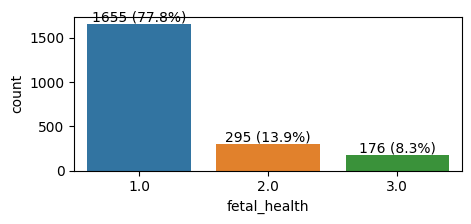

In [28]:
print("Counts of class column")

_, cnts = np.unique(df['fetal_health'],
                    return_counts=True)
bar_labels = [f"{cnt} ({cnt/df.shape[0]*100:.1f}%)" \
    for cnt in cnts]

plt.figure(figsize=(5, 2))
ax = sns.countplot(
    x=df['fetal_health']
)
ax.bar_label(ax.containers[0], labels=bar_labels)

plt.show()

now let us take those parameters which are highly correlated with the fetal health either positive or negative

In [7]:
# correlation with output column
df_corr=df.corr()['fetal_health'].sort_values(ascending=False)
df_corr

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

In [8]:
lis=[]
for i in range(len(df_corr)):
  if(df_corr[i]>=0.20 or df_corr[i]<=-0.20):
    lis.append(df_corr.index[i])
lis

['fetal_health',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'histogram_variance',
 'uterine_contractions',
 'histogram_median',
 'mean_value_of_long_term_variability',
 'histogram_mean',
 'histogram_mode',
 'accelerations']

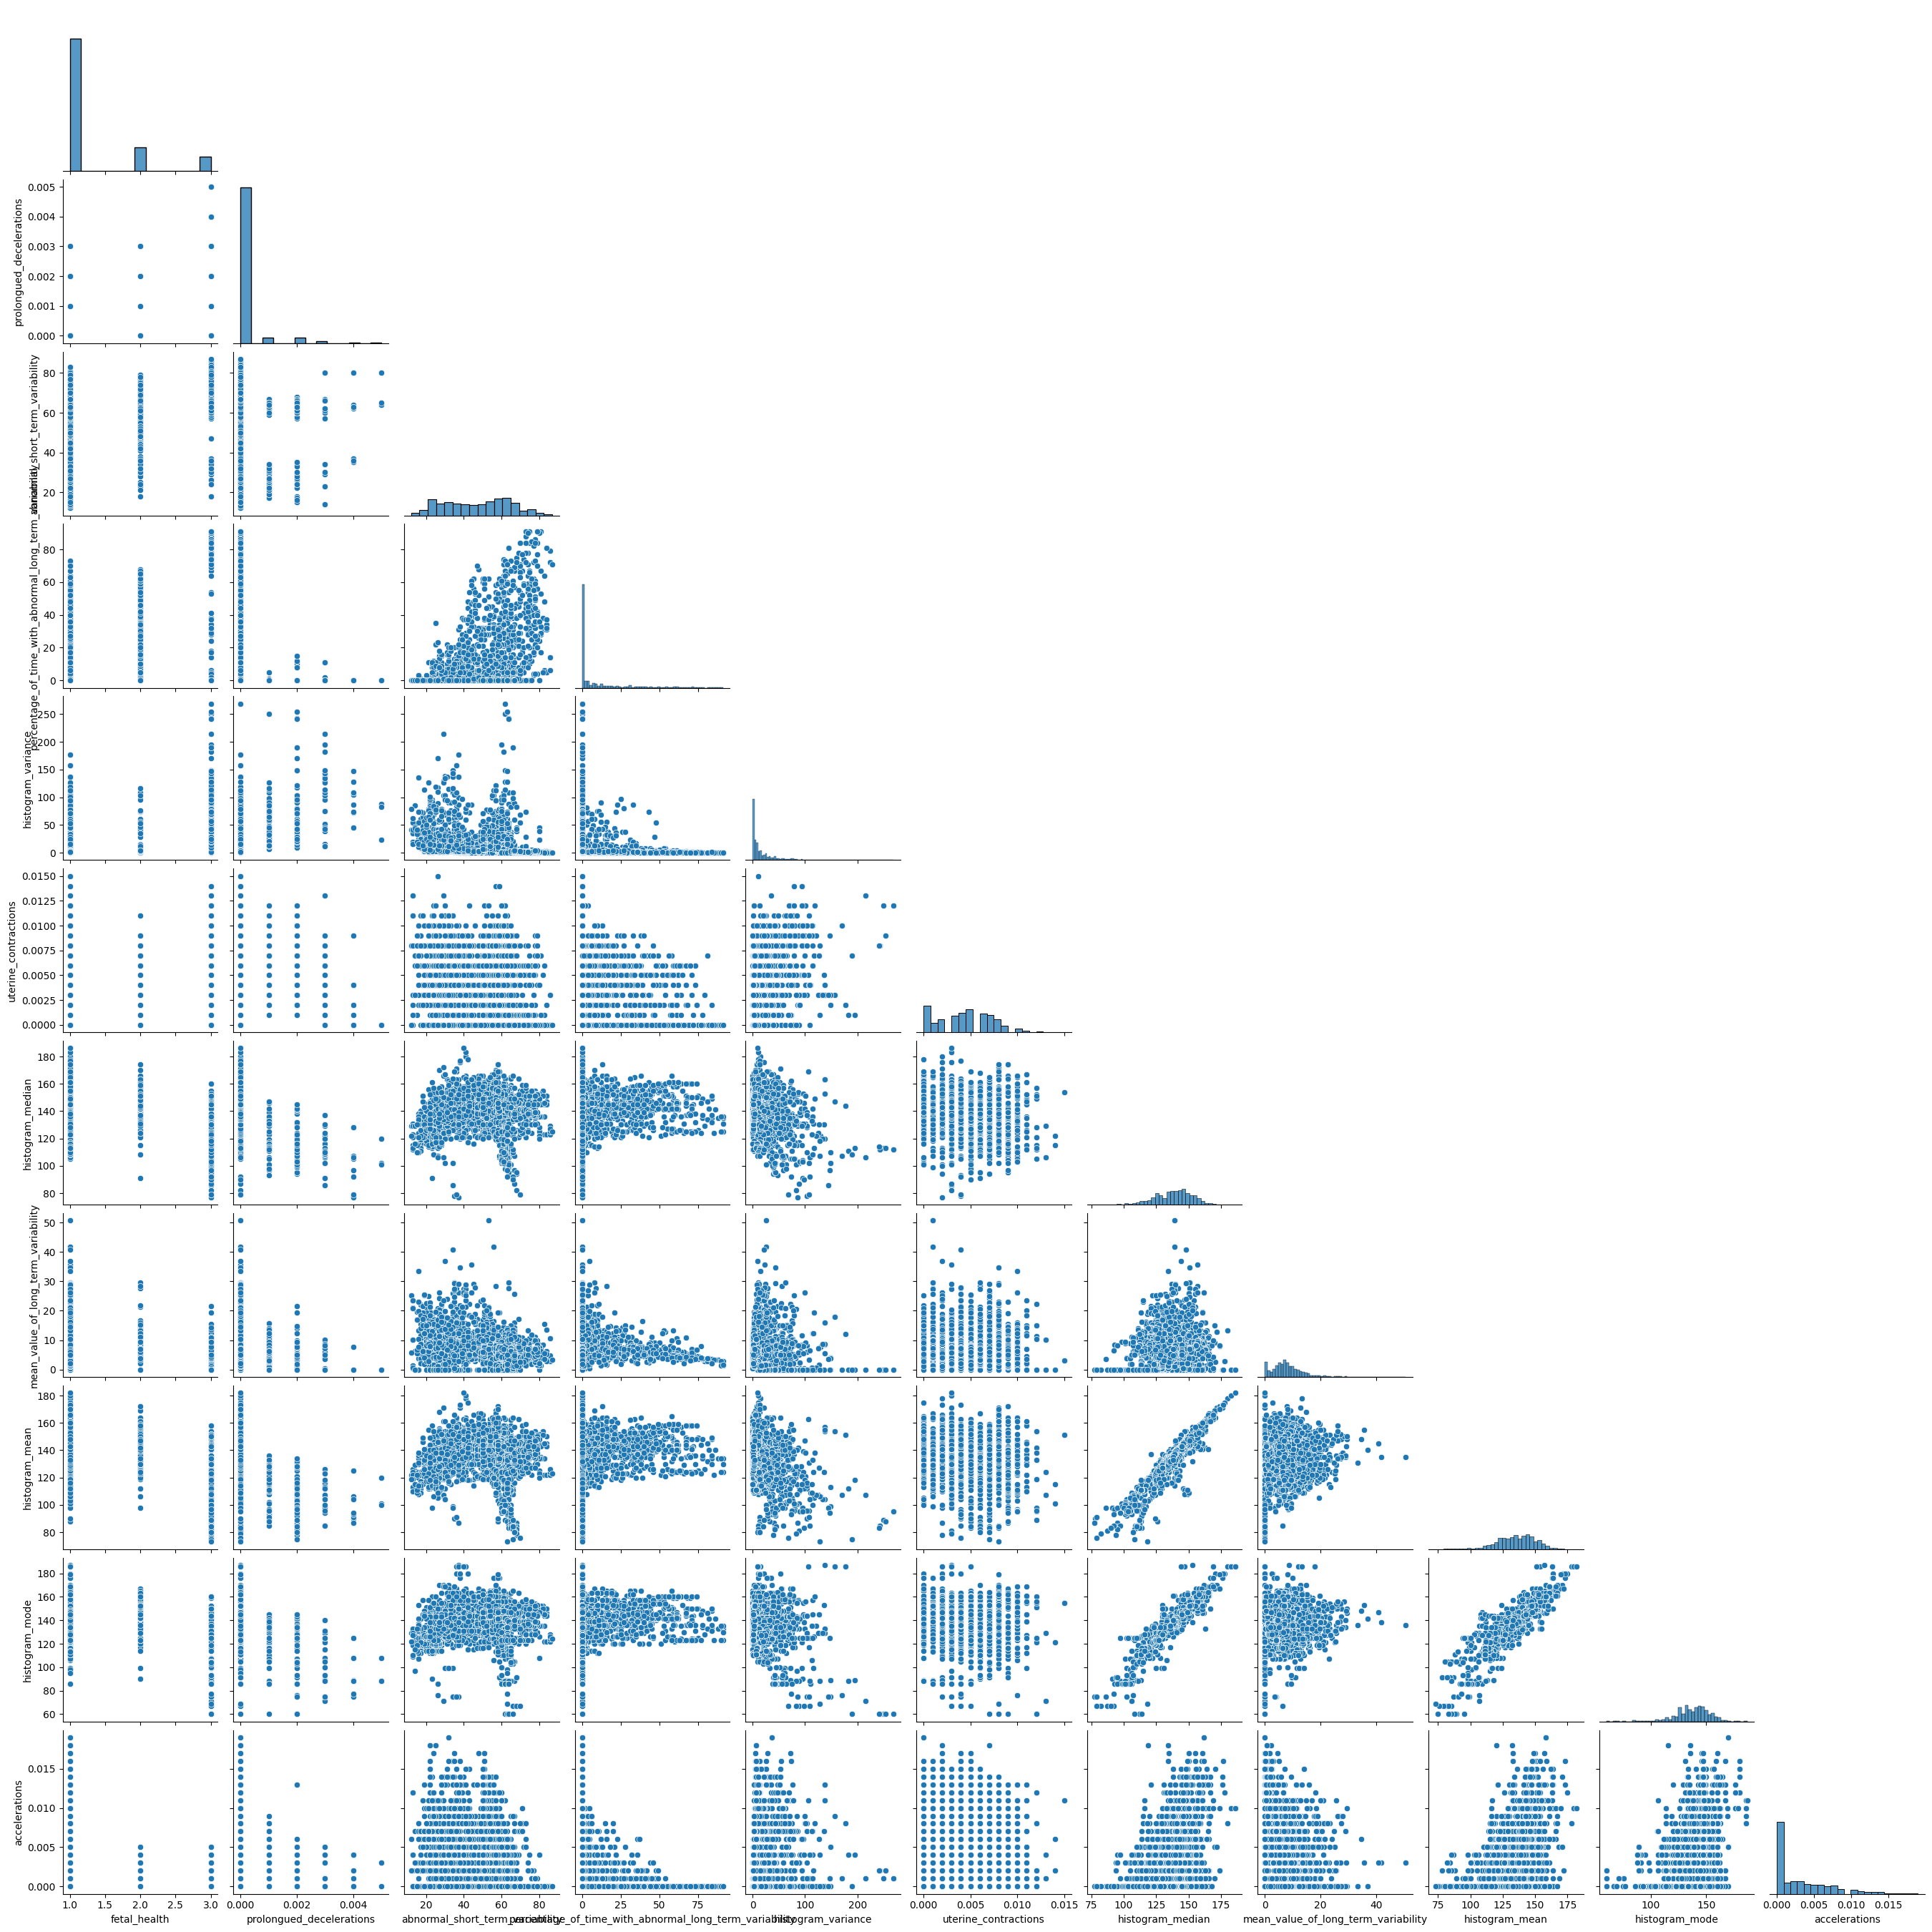

In [9]:
sns.pairplot(df[lis],corner=True)

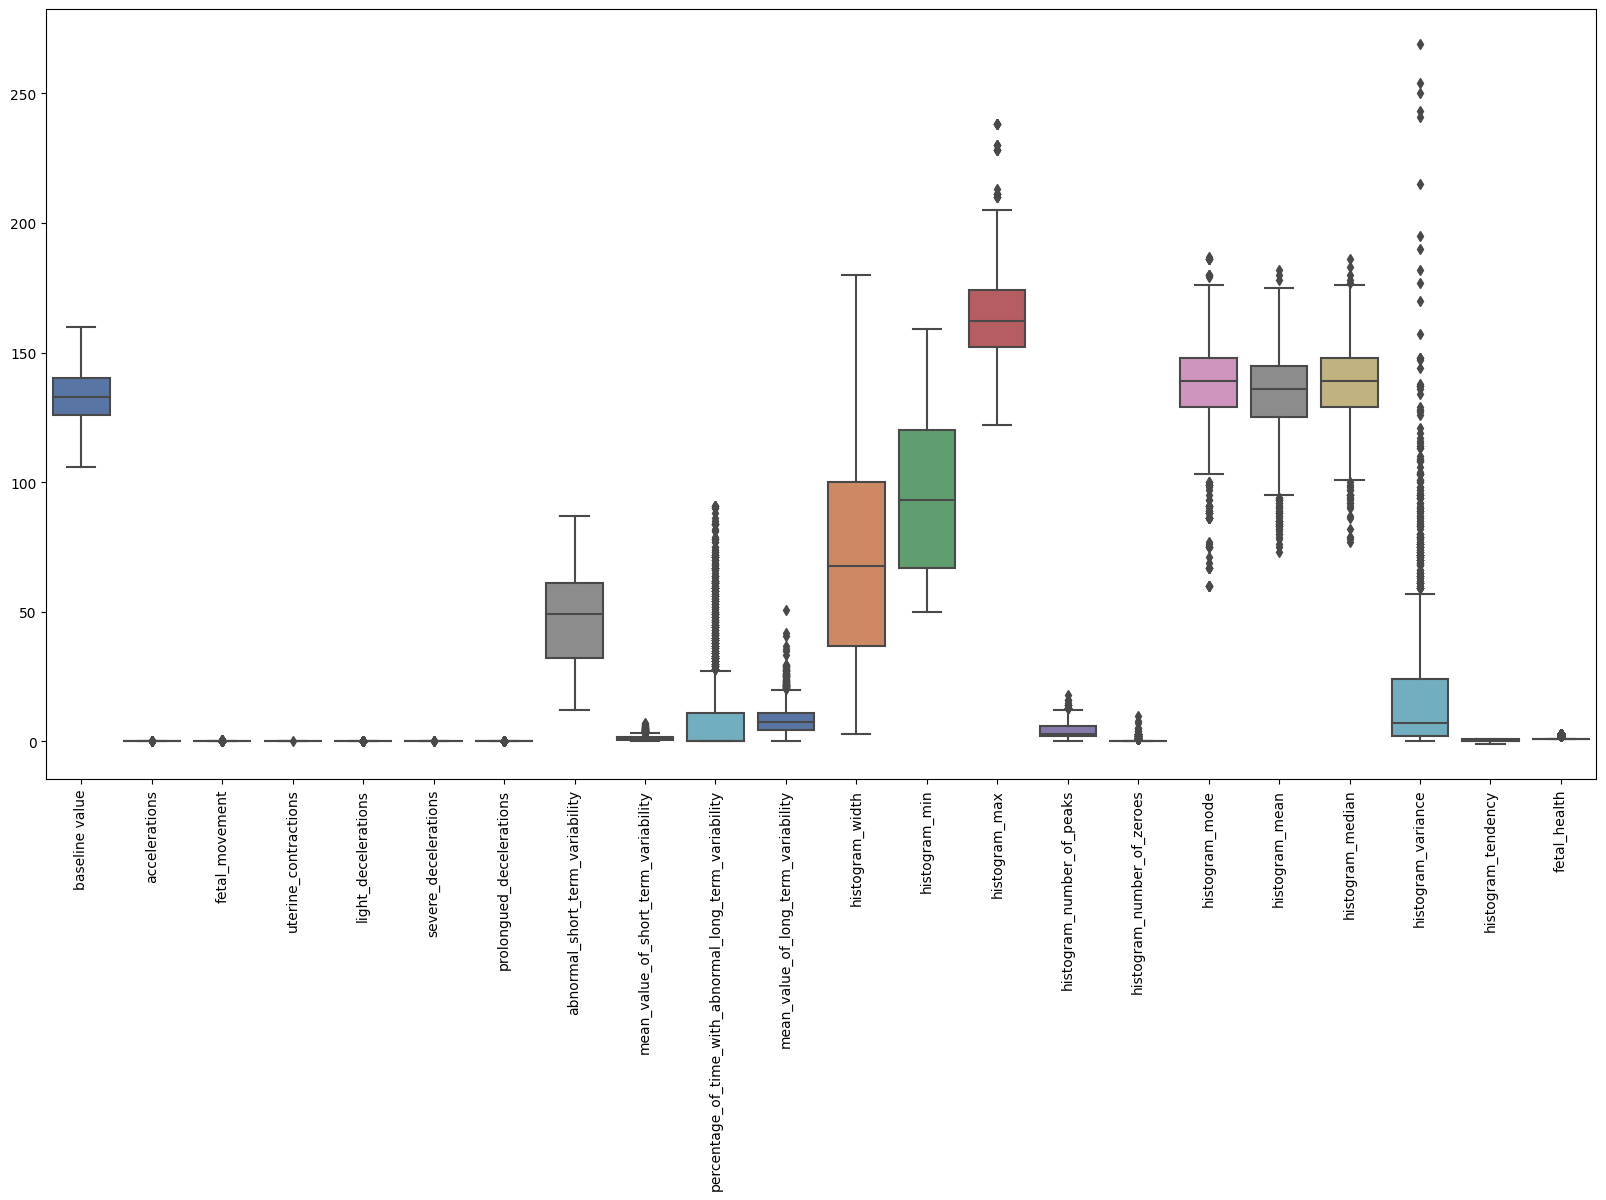

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,palette='deep')
plt.xticks(rotation=90)
plt.show()

we have performed the some EDA on the dataset ,let us now start the process of classification.
firstly we will split the data in train and test , after that we make sure that the data is correctly scaled to avoid any type of error afterwards

In [11]:
X = df.drop('fetal_health',axis=1)
y=df['fetal_health']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
scale = StandardScaler()

In [14]:
# scaling the data
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

now , for this notebook we are using randomforest classifier , which works on using multiple decision trees

In [15]:
# choosing random forest classifier
rf_model = RandomForestClassifier(class_weight='balanced')

In [16]:
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier(class_weight='balanced')

by looking at the scores we say that the model is working fine

In [17]:
rf_model.score(X_test_scaled,y_test)

0.9530075187969925

In [18]:
y_pred = rf_model.predict(X_test_scaled)

In [19]:
confusion_matrix(y_test,y_pred)

array([[407,   6,   0],
       [ 16,  65,   1],
       [  2,   0,  35]])

now , we got the results of the classsification , it is very important to understand when to check for which result parameter
we cannot always just see the accuracy and decide that the model is good , because the dataset is not balanced , we already checked that the class are not in  the balaced state in the dataset , so we cannot say that accuracy is a good metric
for that we look into recall and precision
High recall is important when:
The cost of missing positive instances (false negatives) is high. For example, in medical diagnosis, missing the diagnosis of a disease can have severe consequences for the patient.
The goal is to capture as many positive instances as possible, even if it means accepting a higher number of false positives.
high precision is important when:
the cost of marking a positive instance into negative that means we want that the positive instances are very hihly likely to be true , example spam filtering.
so for our case we check that the recall value is high

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       413
         2.0       0.92      0.79      0.85        82
         3.0       0.97      0.95      0.96        37

    accuracy                           0.95       532
   macro avg       0.95      0.91      0.93       532
weighted avg       0.95      0.95      0.95       532

